# Neural Networks (LTAT.02.001) project

Topic: Predict if the bus is leaving the bus stop

Team members: Märt Häkkinen, Anne Ott, Linnet Puskar Liis Simmul

Working with 567 sets of images
Working with 6793 images
Image examples: 
./rear_signal_dataset/20160805_g1k17-08-05-2016_15-57-59_idx99/20160805_g1k17-08-05-2016_15-57-59_idx99_BOO/20160805_g1k17-08-05-2016_15-57-59_idx99_BOO_00002671/light_mask/frame00002671.png
BOO


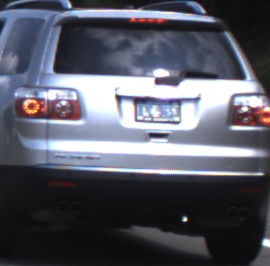

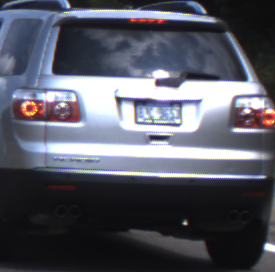

./rear_signal_dataset/20160805_g1k17-08-05-2016_15-57-59_idx99/20160805_g1k17-08-05-2016_15-57-59_idx99_BOO/20160805_g1k17-08-05-2016_15-57-59_idx99_BOO_00002671/light_mask/frame00002672.png
BOO


In [1]:
import os
from IPython.display import Image as _Imgdis

difficulty = "Easy"

dataset_folder = "./rear_signal_dataset"
X_train_path = []
Y_train = []
image_count = 0
sequence_limit = 12

labels = []

with open("{0}/{1}.txt".format(dataset_folder, difficulty)) as f:
    content = f.readlines()
    for folder in content:
        # Load the data
        folder_components = folder.split("_")
        folder_components[-1] = folder_components[-1][:-1]
        base = str("_".join(folder_components[:-2]))
        folder = "{0}/{1}/{2}".format(dataset_folder, base, (base + "_" + str(folder_components[-2])))
        folder += "/" + (str("_".join(folder_components)))
        folder += "/light_mask"
        images = [folder + "/" + f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
        image_count += len(images[0:sequence_limit])
        X_train_path.append(images[0:sequence_limit])
        Y_train.append(folder_components[-2])


print("Working with {0} sets of images".format(len(X_train_path)))
print("Working with {0} images".format(image_count))
print("Image examples: ")

for i in range(0, 2):
    print(X_train_path[0][i])
    print(Y_train[0])
    display(_Imgdis(filename=X_train_path[0][i], width=240, height=320))

In [2]:
import keras
from keras.preprocessing.image import img_to_array, array_to_img
from PIL import Image
import numpy as np

#import sys
#!pip install --prefix {sys.prefix} opencv-python==4.2.0.34

import cv2

Using TensorFlow backend.


In [4]:
X_train = []
resize_dimension = 64

for i in range(len(X_train_path)):
    for j in range(len(X_train_path[i])):
        img = Image.open(X_train_path[i][j])
        img_array = cv2.resize(img_to_array(img), dsize=(resize_dimension, resize_dimension))
        X_train.append(img_array)

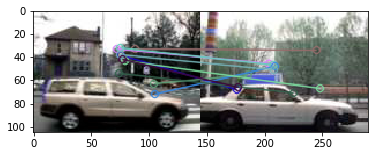

(<matplotlib.image.AxesImage at 0x2bd43587988>, None)

In [11]:
from matplotlib import pyplot as plt

img1 = cv2.imread('car1.jpg',cv2.COLOR_BGR2GRAY) # queryImage
img2 = cv2.imread('car2.jpg',cv2.COLOR_BGR2GRAY) # trainImage
# Initiate SIFT detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)
# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance) 
# Draw first 10 matches.
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:10],None, flags=2)

plt.imshow(img3),plt.show()